In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from datetime import datetime

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [3]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [4]:
#Mean Absolute Percentage Error 

def get_MAPE(actual, forecasted):
    return np.round(np.mean(np.abs((actual-forecasted))/actual)*100,2)

In [5]:
Exp_data = pd.read_csv('mar_sep_min.csv', header = 0)

In [6]:
Exp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292321 entries, 0 to 292320
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            292321 non-null  int64  
 1   Property_num  292321 non-null  object 
 2   Temp          292321 non-null  int64  
 3   noted_Date    292321 non-null  object 
 4   Status        292321 non-null  object 
 5   Humidity      292321 non-null  float64
 6   Dust          292321 non-null  int64  
 7   CO2_level     292321 non-null  float64
 8   room_id       292321 non-null  object 
 9   Floor_Number  292321 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 22.3+ MB


In [7]:
Exp_data.rename(columns={'Property_num': 'Property num','noted_Date':'noted Date','CO2_level':'CO2 level'}, inplace = True)

In [8]:
min(Exp_data['Temp'] ), max(Exp_data['Temp'] )

(35, 49)

In [9]:
Exp_data[Exp_data['Property num']=='B1'].head()

,ID,Property num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number
5,6,B1,49,2022-03-01 00:05:00,out,39.31,2,409.37,FL3_RM3,3
7,8,B1,36,2022-03-01 00:07:00,out,20.27,2,420.69,FL2_RM4,2
8,9,B1,43,2022-03-01 00:08:00,out,11.88,4,435.70,FL3_RM3,3
14,15,B1,35,2022-03-01 00:14:00,out,68.05,2,372.07,FL4_RM1,4
17,18,B1,44,2022-03-01 00:17:00,out,-15.20,3,415.25,FL1_RM1,1


In [10]:
len(Exp_data)

292321

In [11]:
Exp_data['Property num'].dtype

dtype('O')

In [12]:
Exp_data['noted Date'] = pd.to_datetime(Exp_data['noted Date'])

In [13]:
Exp_data.head()

,ID,Property num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4
2,3,B4,47,2022-03-01 00:02:00,out,38.53,3,388.49,FL1_RM4,1
3,4,B4,41,2022-03-01 00:03:00,out,1.02,4,386.79,FL3_RM3,3
4,5,B2,37,2022-03-01 00:04:00,out,68.47,4,410.94,FL4_RM2,4


In [14]:
Exp_data['date'] = Exp_data['noted Date'].dt.date
Exp_data['time'] = Exp_data['noted Date'].dt.time
Exp_data['day'] = Exp_data['noted Date'].dt.day
Exp_data['month'] = Exp_data['noted Date'].dt.month


In [15]:
max(Exp_data['date'])

datetime.date(2022, 9, 20)

In [16]:
Exp_data.head()

,ID,Property num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number,date,time,day,month
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3,2022-03-01,00:00:00,1,3
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4,2022-03-01,00:01:00,1,3
2,3,B4,47,2022-03-01 00:02:00,out,38.53,3,388.49,FL1_RM4,1,2022-03-01,00:02:00,1,3
3,4,B4,41,2022-03-01 00:03:00,out,1.02,4,386.79,FL3_RM3,3,2022-03-01,00:03:00,1,3
4,5,B2,37,2022-03-01 00:04:00,out,68.47,4,410.94,FL4_RM2,4,2022-03-01,00:04:00,1,3


In [17]:
Exp_data['noted Date'] = pd.to_datetime(Exp_data['noted Date'])

In [18]:
Exp_data['date'] = Exp_data['noted Date'].dt.date
Exp_data['time'] = Exp_data['noted Date'].dt.time
Exp_data['day'] = Exp_data['noted Date'].dt.day
Exp_data['month'] = Exp_data['noted Date'].dt.month

In [19]:
Exp_data.head()

,ID,Property num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number,date,time,day,month
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3,2022-03-01,00:00:00,1,3
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4,2022-03-01,00:01:00,1,3
2,3,B4,47,2022-03-01 00:02:00,out,38.53,3,388.49,FL1_RM4,1,2022-03-01,00:02:00,1,3
3,4,B4,41,2022-03-01 00:03:00,out,1.02,4,386.79,FL3_RM3,3,2022-03-01,00:03:00,1,3
4,5,B2,37,2022-03-01 00:04:00,out,68.47,4,410.94,FL4_RM2,4,2022-03-01,00:04:00,1,3


In [20]:
def component_avg(df, component):
    return pd.DataFrame(df.groupby('date').agg({component:'mean'}).reset_index())
    

In [21]:
def anomaly_creation(df, component):
    new_var = 'new_'+ component
    if component == 'Temp':
        df[new_var] = df[component]
        df.loc[4,new_var] = df.loc[4,component] *1.1
        df.loc[5,new_var] = df.loc[5,component] *1.14
        df.loc[6,new_var] = df.loc[6,component] *1.18
        df.loc[7,new_var] = df.loc[7,component] *1.25
        df.loc[8,new_var] = df.loc[8,component] *1.3
        df.loc[9,new_var] = df.loc[9,component] *1.28
        df.loc[10,new_var] = df.loc[10,component] *1.29
        df.loc[11,new_var] = df.loc[11,component] *1.31
        df.loc[12,new_var] = df.loc[12,component] *1.34
        
        df.loc[15,new_var] = df.loc[15,component] *0.65

        df.loc[30,new_var] = df.loc[30,component] *1.07
        df.loc[31,new_var] = df.loc[31,component] *1.1
        df.loc[32,new_var] = df.loc[32,component] *1.15
        df.loc[33,new_var] = df.loc[33,component] *1.2
        df.loc[34,new_var] = df.loc[34,component] *1.25
        df.loc[35,new_var] = df.loc[35,component] *1.25
        df.loc[36,new_var] = df.loc[36,component] *1.23
        df.loc[37,new_var] = df.loc[37,component] *1.29
        df.loc[38,new_var] = df.loc[38,component] *1.29
        df.loc[39,new_var] = df.loc[39,component] *1.32       
        df.loc[40,new_var] = df.loc[40,component] *1.32
        df.loc[41,new_var] = df.loc[41,component] *1.37
        df.loc[42,new_var] = df.loc[42,component] *1.38       
        df.loc[43,new_var] = df.loc[43,component] *1.34    
        
        df.loc[47,new_var] = df.loc[47,component] *0.8
        df.loc[48,new_var] = df.loc[48,component] *0.75
        df.loc[49,new_var] = df.loc[49,component] *0.65
        df.loc[50,new_var] = df.loc[50,component] *0.6
        
        df.loc[65,new_var] = df.loc[65,component] *1.1
        
        df.loc[71,new_var] = df.loc[71,component] *1.2
        df.loc[72,new_var] = df.loc[72,component] *1.25
        df.loc[73,new_var] = df.loc[73,component] *1.3

        df.loc[87,new_var] = df.loc[87,component] *0.81
        df.loc[88,new_var] = df.loc[88,component] *0.82
        df.loc[89,new_var] = df.loc[89,component] *0.79        
        df.loc[90,new_var] = df.loc[90,component] *0.77
        df.loc[91,new_var] = df.loc[91,component] *0.77
        df.loc[92,new_var] = df.loc[92,component] *0.79
        df.loc[93,new_var] = df.loc[93,component] *0.74
        df.loc[94,new_var] = df.loc[94,component] *0.77
        df.loc[95,new_var] = df.loc[95,component] *0.73
        

        
        df.loc[110,new_var] = df.loc[110,component] *1.15
        df.loc[112,new_var] = df.loc[112,component] *0.6
        df.loc[114,new_var] = df.loc[114,component] *1.1
        df.loc[116,new_var] = df.loc[116,component] *1.2

        df.loc[125,new_var] = df.loc[125,component] *1.06
        df.loc[140,new_var] = df.loc[140,component] *0.5 
        df.loc[145,new_var] = df.loc[145,component] *0.63
        
        df.loc[150,new_var] = df.loc[150,component] *0.8
        df.loc[151,new_var] = df.loc[151,component] *0.7 

        df.loc[157,new_var] = df.loc[157,component] *1.07 
        df.loc[158,new_var] = df.loc[158,component] *1.12 
        df.loc[159,new_var] = df.loc[159,component] *1.2

        df.loc[157,new_var] = df.loc[157,component] *1.07 
        df.loc[158,new_var] = df.loc[158,component] *1.12 
        df.loc[159,new_var] = df.loc[159,component] *1.2 
        df.loc[160,new_var] = df.loc[160,component] *1.25 
        
        df.loc[170,new_var] = df.loc[170,component] *1.1
        df.loc[171,new_var] = df.loc[171,component] *1.15 
        df.loc[172,new_var] = df.loc[172,component] *1.12
        df.loc[173,new_var] = df.loc[173,component] *1.09
        df.loc[174,new_var] = df.loc[174,component] *1.25 
        
        df.loc[186,new_var] = df.loc[186,component] *0.75
        df.loc[187,new_var] = df.loc[187,component] *0.65  
  
        df.loc[192,new_var] = df.loc[192,component] *1.17      
        df.loc[193,new_var] = df.loc[193,component] *1.18
        df.loc[194,new_var] = df.loc[194,component] *1.19
        df.loc[195,new_var] = df.loc[195,component] *1.19
        df.loc[196,new_var] = df.loc[196,component] *1.22
        df.loc[197,new_var] = df.loc[197,component] *1.24        
        df.loc[198,new_var] = df.loc[198,component] *1.29
        df.loc[199,new_var] = df.loc[199,component] *1.24
        df.loc[200,new_var] = df.loc[200,component] *1.27
        df.loc[201,new_var] = df.loc[201,component] *1.33
        df.loc[202,new_var] = df.loc[202,component] *1.28    
        
    else:   
        df[new_var] = df[component]
        df.loc[4,new_var] = df.loc[4,component] *1.12
        df.loc[5,new_var] = df.loc[5,component] *1.17
        df.loc[6,new_var] = df.loc[6,component] *1.14
        df.loc[7,new_var] = df.loc[7,component] *1.12
        df.loc[8,new_var] = df.loc[8,component] *1.11
        df.loc[9,new_var] = df.loc[9,component] *1.14
        df.loc[10,new_var] = df.loc[10,component] *1.18
        df.loc[11,new_var] = df.loc[11,component] *1.15
        df.loc[12,new_var] = df.loc[12,component] *1.17
        
        df.loc[15,new_var] = df.loc[15,component] *1.12

        df.loc[30,new_var] = df.loc[30,component] *1.14
        df.loc[31,new_var] = df.loc[31,component] *1.12
        df.loc[32,new_var] = df.loc[32,component] *1.14
        df.loc[33,new_var] = df.loc[33,component] *1.12
        df.loc[34,new_var] = df.loc[34,component] *1.11
        df.loc[35,new_var] = df.loc[35,component] *1.16
        df.loc[36,new_var] = df.loc[36,component] *1.12
        df.loc[37,new_var] = df.loc[37,component] *1.14
        df.loc[38,new_var] = df.loc[38,component] *1.15
        df.loc[39,new_var] = df.loc[39,component] *1.14       
        df.loc[40,new_var] = df.loc[40,component] *1.18
        df.loc[41,new_var] = df.loc[41,component] *1.13
        df.loc[42,new_var] = df.loc[42,component] *1.18       
        df.loc[43,new_var] = df.loc[43,component] *1.15    
        
        df.loc[47,new_var] = df.loc[47,component] *1.12
        df.loc[48,new_var] = df.loc[48,component] *1.12
        df.loc[49,new_var] = df.loc[49,component] *1.17
        df.loc[50,new_var] = df.loc[50,component] *1.16
        
        df.loc[65,new_var] = df.loc[65,component] *1.1
        
        df.loc[71,new_var] = df.loc[71,component] *1.2
        df.loc[72,new_var] = df.loc[72,component] *1.25
        df.loc[73,new_var] = df.loc[73,component] *1.3

        df.loc[87,new_var] = df.loc[87,component] *1.15
        df.loc[88,new_var] = df.loc[88,component] *1.10
        df.loc[89,new_var] = df.loc[89,component] *1.14      
        df.loc[90,new_var] = df.loc[90,component] *1.13
        df.loc[91,new_var] = df.loc[91,component] *1.14
        df.loc[92,new_var] = df.loc[92,component] *1.14
        df.loc[93,new_var] = df.loc[93,component] *1.12
        df.loc[94,new_var] = df.loc[94,component] *1.15
        df.loc[95,new_var] = df.loc[95,component] *1.15
        
        
        df.loc[110,new_var] = df.loc[110,component] *1.14
        df.loc[112,new_var] = df.loc[112,component] *1.12
        df.loc[114,new_var] = df.loc[114,component] *1.12
        df.loc[116,new_var] = df.loc[116,component] *1.14

        df.loc[125,new_var] = df.loc[125,component] *1.16
        df.loc[140,new_var] = df.loc[140,component] *1.11
        df.loc[145,new_var] = df.loc[145,component] *1.15
        
        df.loc[150,new_var] = df.loc[150,component] *1.13
        df.loc[151,new_var] = df.loc[151,component] *1.12

        df.loc[157,new_var] = df.loc[157,component] *1.07 
        df.loc[158,new_var] = df.loc[158,component] *1.12 
        df.loc[159,new_var] = df.loc[159,component] *1.2

        df.loc[157,new_var] = df.loc[157,component] *1.07 
        df.loc[158,new_var] = df.loc[158,component] *1.12 
        df.loc[159,new_var] = df.loc[159,component] *1.2 
        df.loc[160,new_var] = df.loc[160,component] *1.25 
        
        df.loc[170,new_var] = df.loc[170,component] *1.1
        df.loc[171,new_var] = df.loc[171,component] *1.15 
        df.loc[172,new_var] = df.loc[172,component] *1.12
        df.loc[173,new_var] = df.loc[173,component] *1.09
        df.loc[174,new_var] = df.loc[174,component] *1.25 
        
        df.loc[186,new_var] = df.loc[186,component] *1.15
        df.loc[187,new_var] = df.loc[187,component] *1.10  
  
        df.loc[192,new_var] = df.loc[192,component] *1.17      
        df.loc[193,new_var] = df.loc[193,component] *1.18
        df.loc[194,new_var] = df.loc[194,component] *1.19
        df.loc[195,new_var] = df.loc[195,component] *1.19
        df.loc[196,new_var] = df.loc[196,component] *1.22
        df.loc[197,new_var] = df.loc[197,component] *1.24        
        df.loc[198,new_var] = df.loc[198,component] *1.29
        df.loc[199,new_var] = df.loc[199,component] *1.24
        df.loc[200,new_var] = df.loc[200,component] *1.27
        df.loc[201,new_var] = df.loc[201,component] *1.33
        df.loc[202,new_var] = df.loc[202,component] *1.28    
        
    
    df['anomaly'] = np.where(df[component]==df[new_var], 0,1) 

    
    return df

In [22]:
def create_anomaly(df, prop_num, flr_rm, component):
#     df=df[(df['date']>= dt1) & (df['date']<= dt2)]
    df=df[(df['Property num']==prop_num) & (df['room_id']==flr_rm)]
    df_avg = component_avg(df, component)
    df_avg['Property_num'] = [prop_num]*len(df_avg)
    df_avg['room_id'] = [flr_rm]*len(df_avg)
    df_anomaly = anomaly_creation(df_avg,component)
    anomaly = df_anomaly[df_anomaly['anomaly']==1]
    
    return df_anomaly, anomaly
    

In [23]:
def train_model(df_anomaly, component):
    new_var = 'new_' + component
    model = SimpleExpSmoothing(df_anomaly[new_var])
    fit_model = model.fit(smoothing_level=0.9, optimized=False)
    pred = 'Pred_' + component
    df_anomaly[pred] = fit_model.fittedvalues
    
    return df_anomaly, fit_model
    

In [24]:
def plot_graphs(df, anomaly,component):
    new_var = 'new_' + component
    pred = 'Pred_' + component

    plt.figure(figsize=(20,10))
    plt.plot(df['date'],df[component], label=component)
    plt.plot(df['date'],df[new_var], label = component + ' '+'with anomaly')
    plt.plot(df['date'],df[pred], '*', label='Predict') 
    
    min_ , max_ , mean_ = min(df[component]),max(df[component]),np.mean(df[component])


    plt.plot(df['date'],([mean_]*len(df)), '-', color = 'green', label='Mean') 
    plt.plot(df['date'],([max_]*len(df)), '-', color = 'red', label='avg_max') 
    plt.plot(df['date'],([min_]*len(df)), '-', color = 'red', label='avg_min') 


    #     Anomalies
    plt.scatter(anomaly['date'], anomaly[new_var], color='r', marker='D')
    plt.legend()
    plt.show()

    

In [25]:
def get_data(df, prop_num, flr_rm, component):
    df_anomaly, anomaly = create_anomaly(df, prop_num, flr_rm, component)
    df_final, final_model = train_model(df_anomaly, component)
    return df_final, final_model, anomaly, component

## Temperature

### For room B2 FL1_RM2

In [26]:
df_final1, final_model1, anomaly1, component1 = get_data(Exp_data, 'B2', 'FL1_RM2', 'Temp')

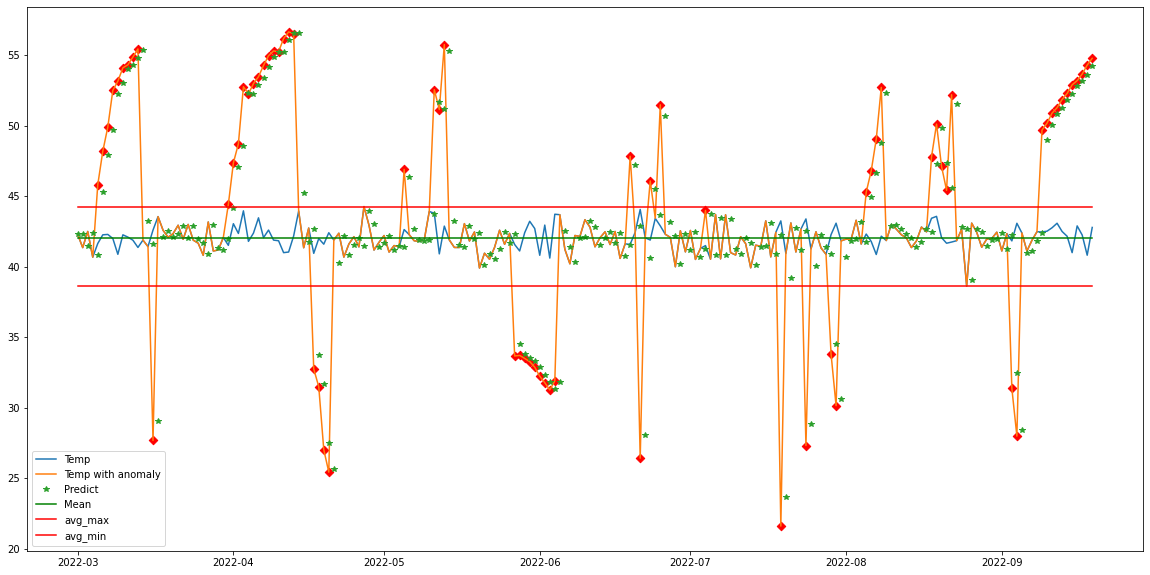

In [27]:
plot_graphs(df_final1, anomaly1,'Temp')

In [28]:
forecast_val1 = final_model1.forecast(10)

In [29]:
forecast_val1

203   54.71
204   54.71
205   54.71
206   54.71
207   54.71
208   54.71
209   54.71
210   54.71
211   54.71
212   54.71
dtype: float64

In [30]:
df_final1.tail(20)

,date,Temp,Property_num,room_id,new_Temp,anomaly,Pred_Temp
183,2022-08-31,42.45,B2,FL1_RM2,42.45,0,41.99
184,2022-09-01,41.12,B2,FL1_RM2,41.12,0,42.40
185,2022-09-02,42.35,B2,FL1_RM2,42.35,0,41.25
186,2022-09-03,41.83,B2,FL1_RM2,31.38,1,42.24
187,2022-09-04,43.08,B2,FL1_RM2,28.00,1,32.46
188,2022-09-05,42.39,B2,FL1_RM2,42.39,0,28.45
189,2022-09-06,41.11,B2,FL1_RM2,41.11,0,41.00
190,2022-09-07,41.88,B2,FL1_RM2,41.88,0,41.10
191,2022-09-08,42.48,B2,FL1_RM2,42.48,0,41.80
192,2022-09-09,42.46,B2,FL1_RM2,49.68,1,42.41


In [31]:
forec = pd.to_datetime(['2022-09-20','2022-09-21','2022-09-22','2022-09-23','2022-09-24','2022-09-25','2022-09-26','2022-09-27','2022-09-28','2022-09-29'])

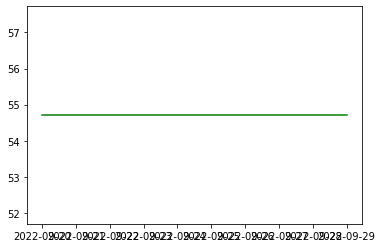

In [32]:
plt.plot(forec, forecast_val1, color='g')

In [33]:
def plot_graphs2(df, anomaly,component, forecast_val):
    new_var = 'new_' + component
    pred = 'Pred_' + component

    plt.figure(figsize=(20,10))
    plt.plot(df['date'],df[new_var], label=component)
    plt.plot(df['date'],df[new_var], label = component + ' '+'with anomaly')
    plt.plot(df['date'],df[pred], '*', label='Predict') 
    plt.plot(forec, forecast_val, color='g')
    
    
    min_ , max_ , mean_ = min(df[component]),max(df[component]),np.mean(df[component])


    plt.plot(df['date'],([mean_]*len(df)), '-', color = 'green', label='Mean') 
    plt.plot(df['date'],([max_]*len(df)), '-', color = 'red', label='avg_max') 
    plt.plot(df['date'],([min_]*len(df)), '-', color = 'red', label='avg_min') 


    #     Anomalies
    plt.scatter(anomaly['date'], anomaly[new_var], color='r', marker='D')
    plt.legend()
    plt.show()

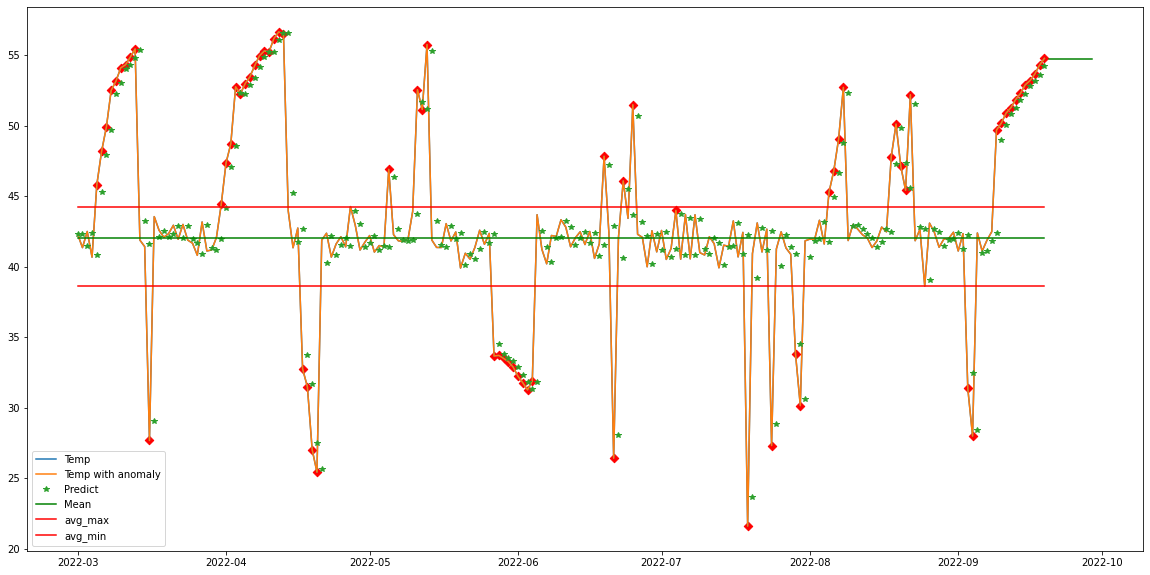

In [34]:
plot_graphs2(df_final1,anomaly1, component1,forecast_val1)

In [35]:
df_final1.drop(['Temp','anomaly'],inplace=True,axis=1)

In [36]:
df_final1.rename(columns={'new_Temp':'Temp','Pred_Temp':'Prediction'},inplace=True)

In [37]:
df_final1.head()

,date,Property_num,room_id,Temp,Prediction
0,2022-03-01,B2,FL1_RM2,42.29,42.29
1,2022-03-02,B2,FL1_RM2,41.36,42.29
2,2022-03-03,B2,FL1_RM2,42.50,41.45
3,2022-03-04,B2,FL1_RM2,40.68,42.40
4,2022-03-05,B2,FL1_RM2,45.81,40.85


### For room B3 FL4_RM3

In [38]:
df_final2, final_model2, anomaly2, component2 = get_data(Exp_data, 'B3', 'FL4_RM3', 'Temp')

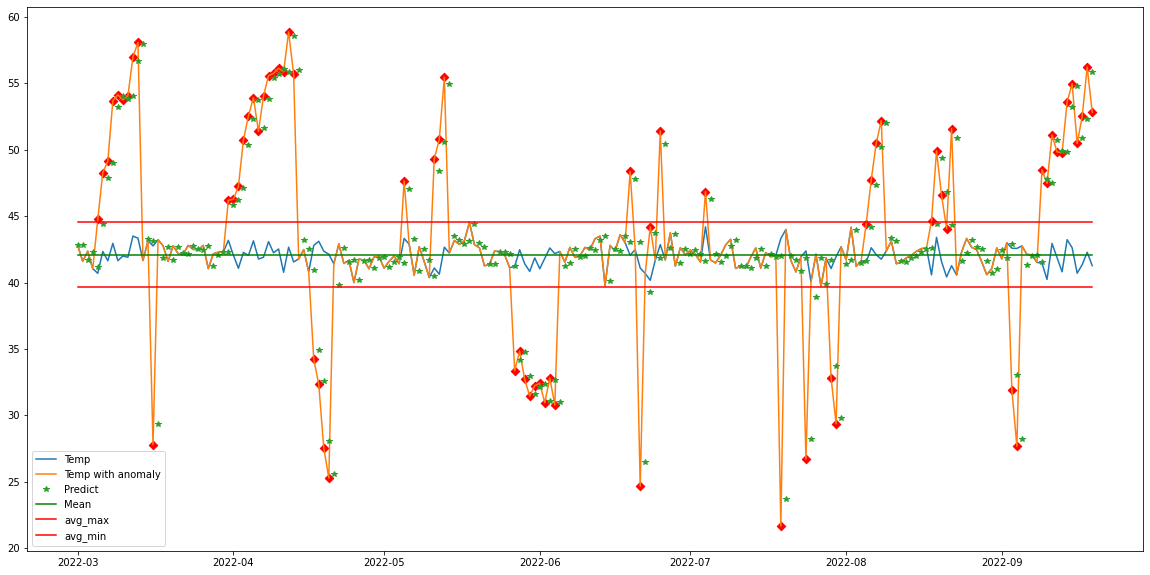

In [39]:
plot_graphs(df_final2, anomaly2,'Temp')

In [40]:
forecast_val2 = final_model2.forecast(10)

In [41]:
forecast_val2

203   53.13
204   53.13
205   53.13
206   53.13
207   53.13
208   53.13
209   53.13
210   53.13
211   53.13
212   53.13
dtype: float64

In [42]:
df_final2.head()

,date,Temp,Property_num,room_id,new_Temp,anomaly,Pred_Temp
0,2022-03-01,42.81,B3,FL4_RM3,42.81,0,42.81
1,2022-03-02,41.60,B3,FL4_RM3,41.60,0,42.81
2,2022-03-03,42.36,B3,FL4_RM3,42.36,0,41.72
3,2022-03-04,41.05,B3,FL4_RM3,41.05,0,42.30
4,2022-03-05,40.70,B3,FL4_RM3,44.77,1,41.17


In [43]:
df_final2.drop(['Temp','anomaly'],inplace=True,axis=1)

In [44]:
df_final2.rename(columns={'new_Temp':'Temp','Pred_Temp':'Prediction'},inplace=True)

In [45]:
df_final2.head()

,date,Property_num,room_id,Temp,Prediction
0,2022-03-01,B3,FL4_RM3,42.81,42.81
1,2022-03-02,B3,FL4_RM3,41.60,42.81
2,2022-03-03,B3,FL4_RM3,42.36,41.72
3,2022-03-04,B3,FL4_RM3,41.05,42.30
4,2022-03-05,B3,FL4_RM3,44.77,41.17


### For room B1 FL3_RM2

In [46]:
df_final3, final_model3, anomaly3, component3 = get_data(Exp_data, 'B1', 'FL3_RM2', 'Temp')

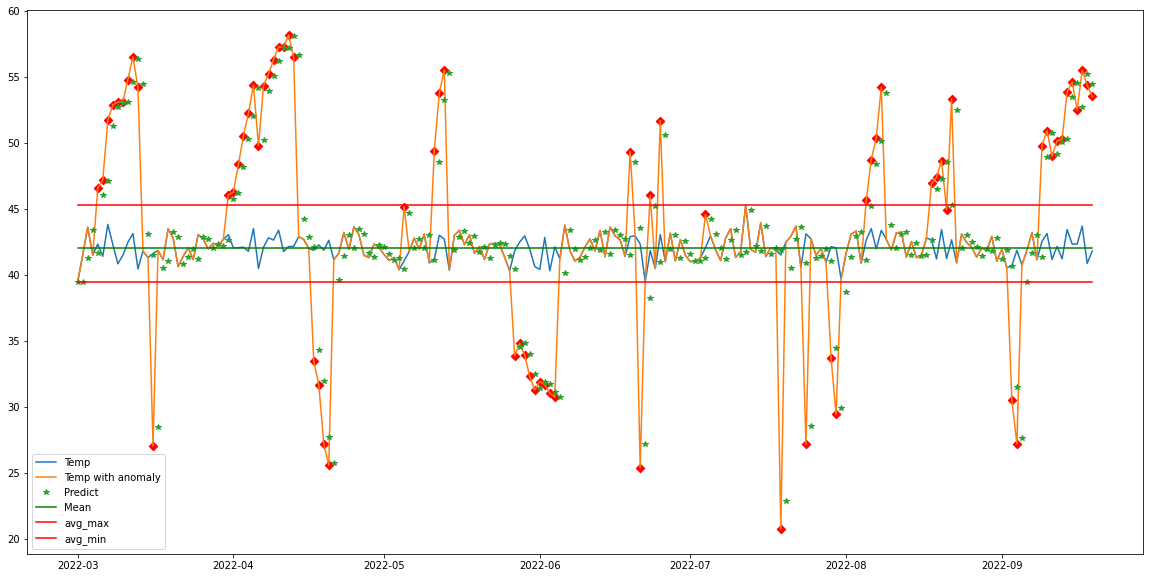

In [47]:
plot_graphs(df_final3, anomaly3,'Temp')

In [48]:
forecast_val3 = final_model3.forecast(10)

In [49]:
forecast_val3

203   53.60
204   53.60
205   53.60
206   53.60
207   53.60
208   53.60
209   53.60
210   53.60
211   53.60
212   53.60
dtype: float64

In [50]:
df_final3.drop(['Temp','anomaly'],inplace=True,axis=1)

In [51]:
df_final3.rename(columns={'new_Temp':'Temp','Pred_Temp':'Prediction'},inplace=True)

In [52]:
df_final3.head()

,date,Property_num,room_id,Temp,Prediction
0,2022-03-01,B1,FL3_RM2,39.48,39.48
1,2022-03-02,B1,FL3_RM2,41.50,39.48
2,2022-03-03,B1,FL3_RM2,43.61,41.30
3,2022-03-04,B1,FL3_RM2,41.50,43.38
4,2022-03-05,B1,FL3_RM2,46.57,41.69


In [53]:
df_final = pd.concat([df_final1, df_final2, df_final3])

In [54]:
df_final.tail()

,date,Property_num,room_id,Temp,Prediction
198,2022-09-15,B1,FL3_RM2,54.61,53.49
199,2022-09-16,B1,FL3_RM2,52.49,54.50
200,2022-09-17,B1,FL3_RM2,55.49,52.69
201,2022-09-18,B1,FL3_RM2,54.35,55.21
202,2022-09-19,B1,FL3_RM2,53.50,54.44


In [55]:
df_final.drop('Prediction',axis=1,inplace=True)

In [56]:
Exp_data.head()

,ID,Property num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number,date,time,day,month
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3,2022-03-01,00:00:00,1,3
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4,2022-03-01,00:01:00,1,3
2,3,B4,47,2022-03-01 00:02:00,out,38.53,3,388.49,FL1_RM4,1,2022-03-01,00:02:00,1,3
3,4,B4,41,2022-03-01 00:03:00,out,1.02,4,386.79,FL3_RM3,3,2022-03-01,00:03:00,1,3
4,5,B2,37,2022-03-01 00:04:00,out,68.47,4,410.94,FL4_RM2,4,2022-03-01,00:04:00,1,3


In [57]:
exp_copy = Exp_data.copy()
df_copy = df_final.copy()

In [58]:
exp_copy.rename(columns={'Property num':'Property_num'},inplace=True)
df_copy.rename(columns={'Temp':'new_Temp'},inplace=True)

In [59]:
s1 = pd.merge(exp_copy,df_copy,how='left',on=['date','Property_num','room_id'])

In [60]:
s1.head()

,ID,Property_num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number,date,time,day,month,new_Temp
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3,2022-03-01,00:00:00,1,3,NaN
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4,2022-03-01,00:01:00,1,3,NaN
2,3,B4,47,2022-03-01 00:02:00,out,38.53,3,388.49,FL1_RM4,1,2022-03-01,00:02:00,1,3,NaN
3,4,B4,41,2022-03-01 00:03:00,out,1.02,4,386.79,FL3_RM3,3,2022-03-01,00:03:00,1,3,NaN
4,5,B2,37,2022-03-01 00:04:00,out,68.47,4,410.94,FL4_RM2,4,2022-03-01,00:04:00,1,3,NaN


In [61]:
s1.new_Temp = np.where(s1.new_Temp.isnull(),s1.Temp, s1.new_Temp)

In [62]:
s1.head()

,ID,Property_num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number,date,time,day,month,new_Temp
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3,2022-03-01,00:00:00,1,3,46.00
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4,2022-03-01,00:01:00,1,3,42.00
2,3,B4,47,2022-03-01 00:02:00,out,38.53,3,388.49,FL1_RM4,1,2022-03-01,00:02:00,1,3,47.00
3,4,B4,41,2022-03-01 00:03:00,out,1.02,4,386.79,FL3_RM3,3,2022-03-01,00:03:00,1,3,41.00
4,5,B2,37,2022-03-01 00:04:00,out,68.47,4,410.94,FL4_RM2,4,2022-03-01,00:04:00,1,3,37.00


In [63]:
s1.drop(['Temp','Humidity','Dust','CO2 level','date','time','day','month'],axis=1,inplace=True)

In [64]:
s1_final = s1.copy()

In [65]:
s1_final.rename(columns={'new_Temp':'Reading_values'},inplace=True)

In [66]:
s1_final.head()

,ID,Property_num,noted Date,Status,room_id,Floor_Number,Reading_values
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,46.00
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,42.00
2,3,B4,2022-03-01 00:02:00,out,FL1_RM4,1,47.00
3,4,B4,2022-03-01 00:03:00,out,FL3_RM3,3,41.00
4,5,B2,2022-03-01 00:04:00,out,FL4_RM2,4,37.00


In [67]:
s1_final['v_attributes']='Temperature'
s1_final.head()

,ID,Property_num,noted Date,Status,room_id,Floor_Number,Reading_values,v_attributes
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,46.00,Temperature
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,42.00,Temperature
2,3,B4,2022-03-01 00:02:00,out,FL1_RM4,1,47.00,Temperature
3,4,B4,2022-03-01 00:03:00,out,FL3_RM3,3,41.00,Temperature
4,5,B2,2022-03-01 00:04:00,out,FL4_RM2,4,37.00,Temperature


In [68]:
# s1.to_csv('Temp_Report_with_anomalies',index=False)

## CO2

### For B1 FL3_RM2

In [69]:
df_final4, final_model4, anomaly4, component4 = get_data(Exp_data, 'B1', 'FL3_RM2', 'CO2 level')

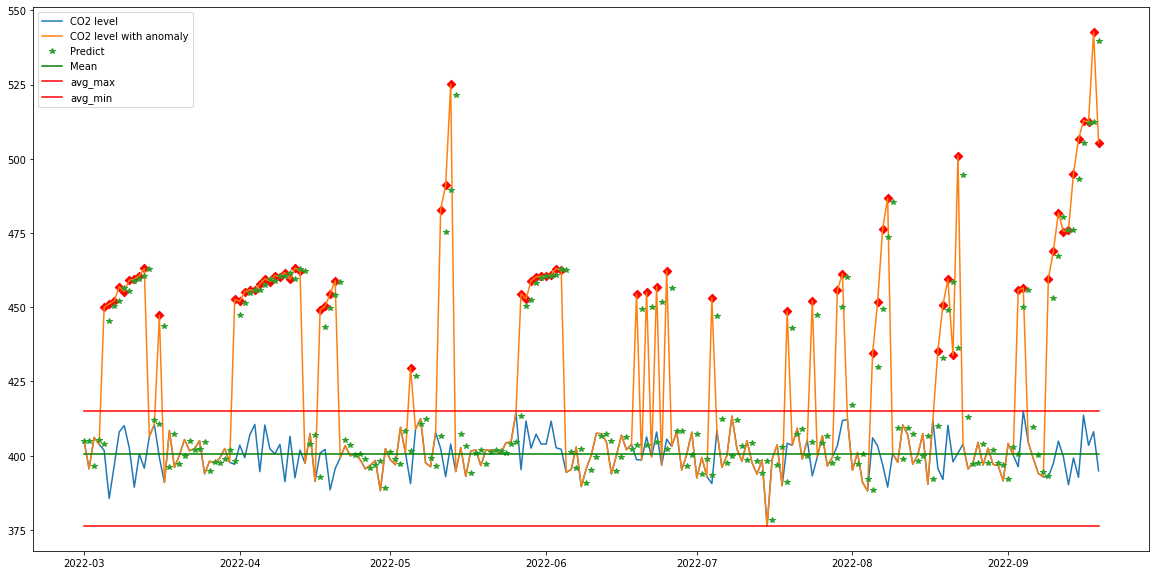

In [70]:
plot_graphs(df_final4, anomaly4,'CO2 level')

In [71]:
df_final4.tail(11)

,date,CO2 level,Property_num,room_id,new_CO2 level,anomaly,Pred_CO2 level
192,2022-09-09,392.88,B1,FL3_RM2,459.66,1,393.01
193,2022-09-10,397.39,B1,FL3_RM2,468.92,1,453.00
194,2022-09-11,404.90,B1,FL3_RM2,481.83,1,467.33
195,2022-09-12,399.57,B1,FL3_RM2,475.49,1,480.38
196,2022-09-13,390.17,B1,FL3_RM2,476.01,1,475.98
197,2022-09-14,399.21,B1,FL3_RM2,495.02,1,476.00
198,2022-09-15,392.67,B1,FL3_RM2,506.54,1,493.12
199,2022-09-16,413.59,B1,FL3_RM2,512.86,1,505.20
200,2022-09-17,403.46,B1,FL3_RM2,512.40,1,512.09
201,2022-09-18,408.07,B1,FL3_RM2,542.73,1,512.37


In [72]:
forecast_val4 = final_model4.forecast(10)

In [73]:
forecast_val4

203   508.88
204   508.88
205   508.88
206   508.88
207   508.88
208   508.88
209   508.88
210   508.88
211   508.88
212   508.88
dtype: float64

In [74]:
forec = pd.to_datetime(['2022-09-20','2022-09-21','2022-09-22','2022-09-23','2022-09-24','2022-09-25','2022-09-26','2022-09-27','2022-09-28','2022-09-29'])

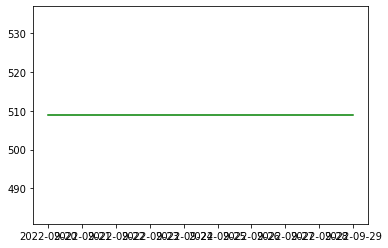

In [75]:
plt.plot(forec, forecast_val4, color='g')

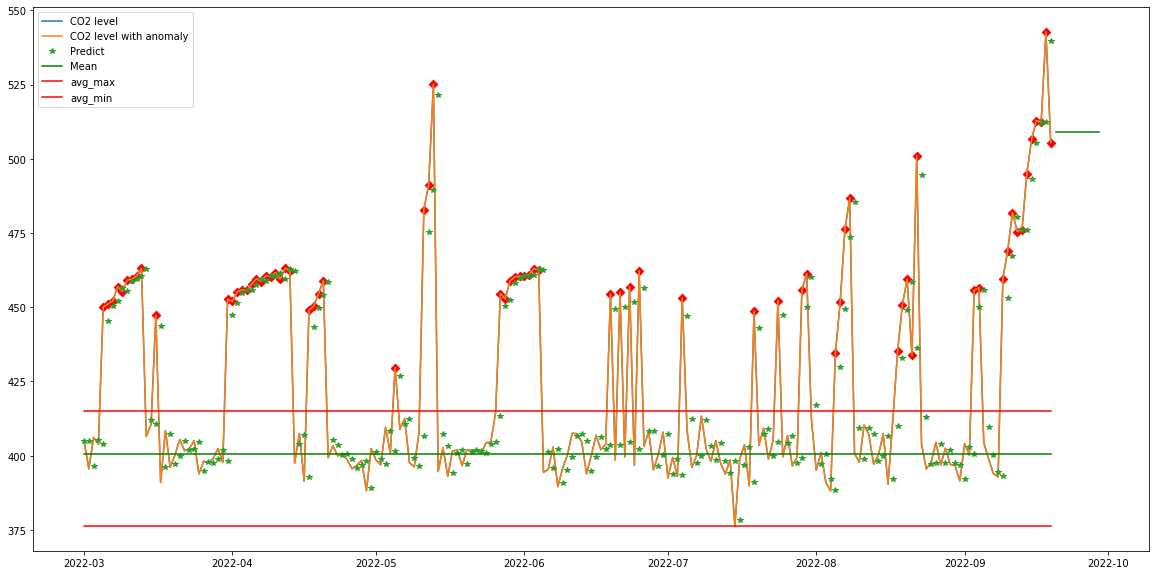

In [76]:
plot_graphs2(df_final4,anomaly4, component4,forecast_val4)

### For room B4 FL1_RM2

In [77]:
df_final5, final_model5, anomaly5, component5 = get_data(Exp_data, 'B4', 'FL1_RM2', 'CO2 level')

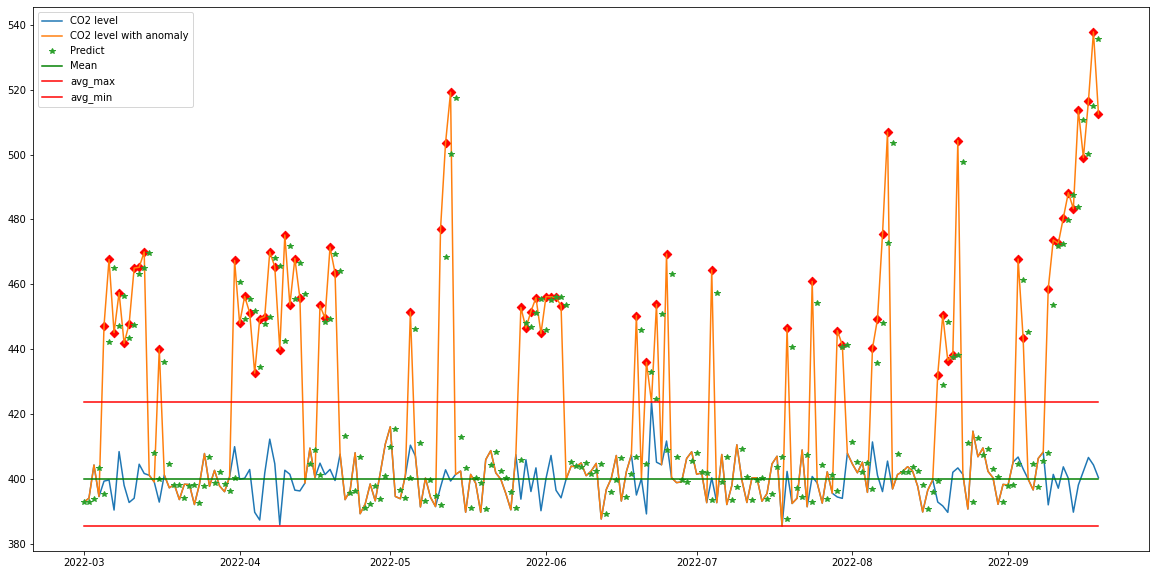

In [78]:
plot_graphs(df_final5, anomaly5,'CO2 level')

In [79]:
forecast_val5 = final_model5.forecast(10)

In [80]:
forecast_val5

203   514.81
204   514.81
205   514.81
206   514.81
207   514.81
208   514.81
209   514.81
210   514.81
211   514.81
212   514.81
dtype: float64

In [81]:
forec = pd.to_datetime(['2022-09-20','2022-09-21','2022-09-22','2022-09-23','2022-09-24','2022-09-25','2022-09-26','2022-09-27','2022-09-28','2022-09-29'])

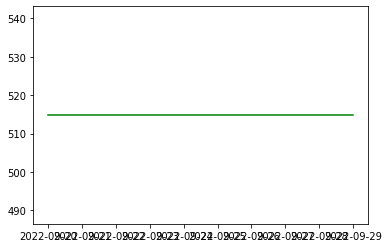

In [82]:
plt.plot(forec, forecast_val5, color='g')

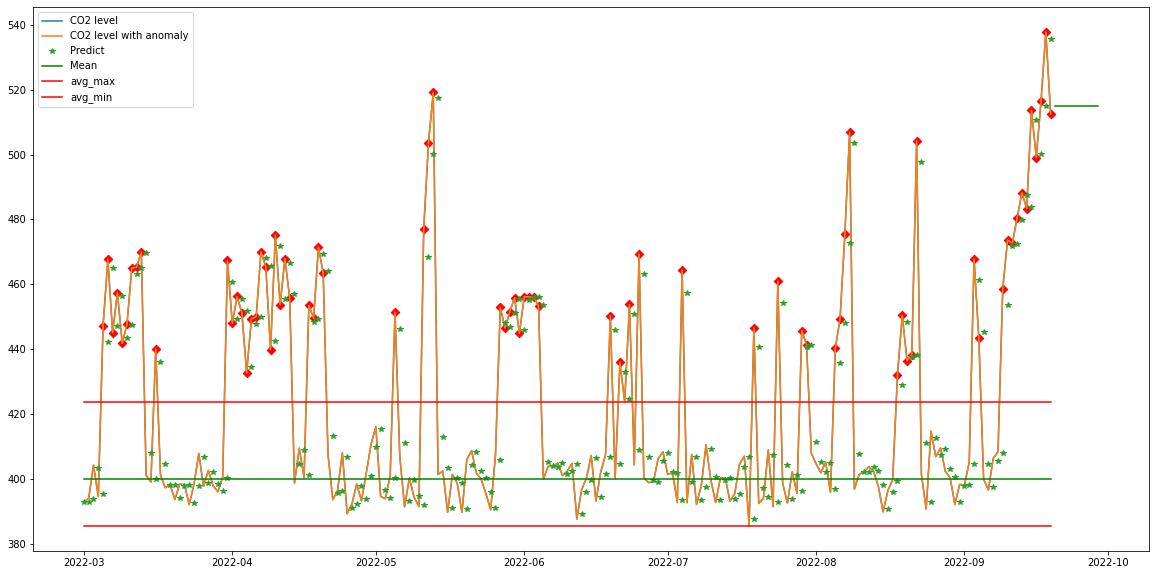

In [83]:
plot_graphs2(df_final5,anomaly5, component5,forecast_val5)

### For room B3 FL2_RM1

In [84]:
df_final6, final_model6, anomaly6, component6 = get_data(Exp_data, 'B3', 'FL2_RM1', 'CO2 level')

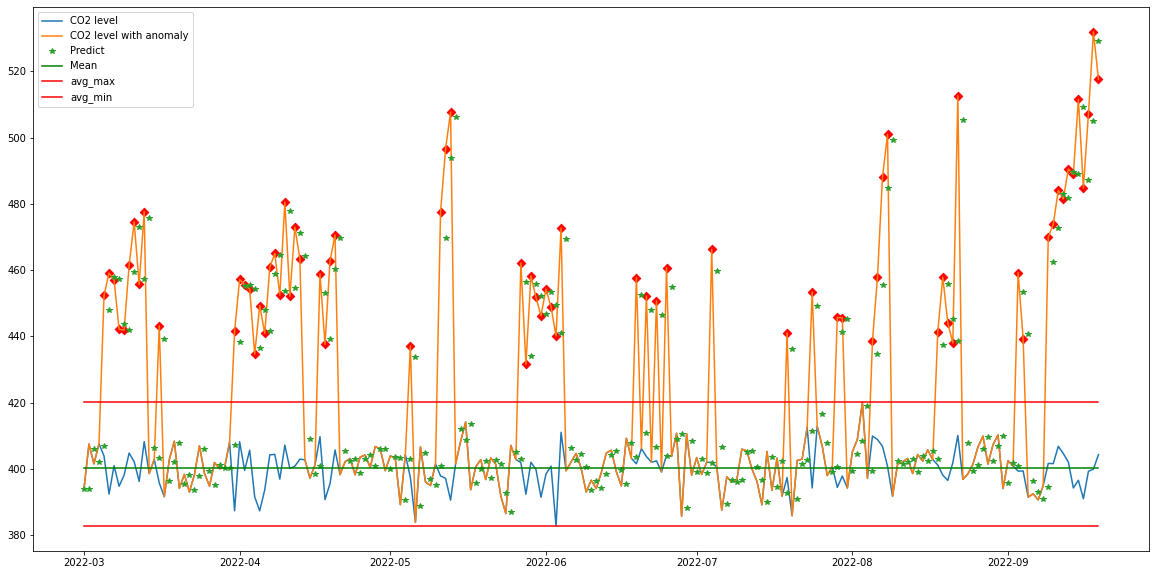

In [85]:
plot_graphs(df_final6, anomaly6,'CO2 level')

In [86]:
forecast_val6 = final_model6.forecast(10)

In [87]:
forecast_val6

203   518.74
204   518.74
205   518.74
206   518.74
207   518.74
208   518.74
209   518.74
210   518.74
211   518.74
212   518.74
dtype: float64

In [88]:
forec = pd.to_datetime(['2022-09-20','2022-09-21','2022-09-22','2022-09-23','2022-09-24','2022-09-25','2022-09-26','2022-09-27','2022-09-28','2022-09-29'])

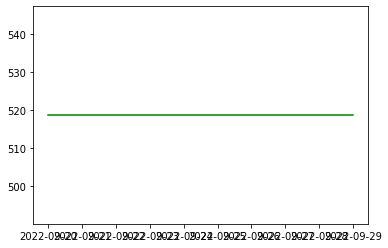

In [89]:
plt.plot(forec, forecast_val6, color='g')

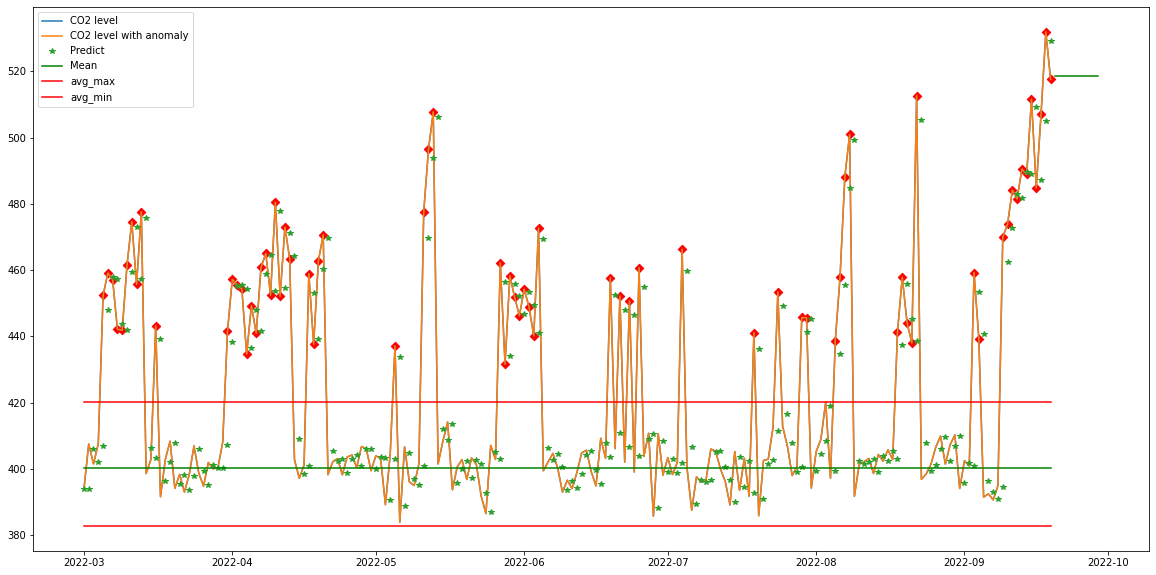

In [90]:
plot_graphs2(df_final6,anomaly6, component6,forecast_val6)

In [91]:
df_final2 = pd.concat([df_final4, df_final5, df_final6])

In [92]:
df_final2.head(2)

,date,CO2 level,Property_num,room_id,new_CO2 level,anomaly,Pred_CO2 level
0,2022-03-01,404.91,B1,FL3_RM2,404.91,0,404.91
1,2022-03-02,395.57,B1,FL3_RM2,395.57,0,404.91


In [93]:
df_final2.drop('Pred_CO2 level',axis=1,inplace=True)

In [94]:
df_final2.drop(['CO2 level','anomaly'],axis=1,inplace=True)

In [95]:
exp_copy2 = Exp_data.copy()
df_copy2 = df_final2.copy()

In [96]:
exp_copy2.rename(columns={'Property num':'Property_num'},inplace=True)


In [97]:
s2 = pd.merge(exp_copy2,df_copy2,how='left',on=['date','Property_num','room_id'])

In [98]:
s2.head(2)

,ID,Property_num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number,date,time,day,month,new_CO2 level
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3,2022-03-01,00:00:00,1,3,NaN
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4,2022-03-01,00:01:00,1,3,NaN


In [99]:
s2['new_CO2 level'] = np.where(s2['new_CO2 level'].isnull(),s2['CO2 level'], s2['new_CO2 level'])

In [100]:
s2.drop(['Temp','Humidity','Dust','CO2 level','date','time','day','month'],axis=1,inplace=True)

In [101]:
s2_final = s2.copy()

In [102]:
s2_final.rename(columns={'new_CO2 level':'Reading_values'},inplace=True)

In [103]:
s2_final['v_attributes']='CO2_level'
s2_final.head()

,ID,Property_num,noted Date,Status,room_id,Floor_Number,Reading_values,v_attributes
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,445.68,CO2_level
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,412.39,CO2_level
2,3,B4,2022-03-01 00:02:00,out,FL1_RM4,1,388.49,CO2_level
3,4,B4,2022-03-01 00:03:00,out,FL3_RM3,3,386.79,CO2_level
4,5,B2,2022-03-01 00:04:00,out,FL4_RM2,4,410.94,CO2_level


In [104]:
#final report with amomaloies
final_report = pd.concat([s1_final,s2_final],axis=0,ignore_index=True)
final_report['ID'] = final_report.index + 1
final_report

,ID,Property_num,noted Date,Status,room_id,Floor_Number,Reading_values,v_attributes
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,46.00,Temperature
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,42.00,Temperature
2,3,B4,2022-03-01 00:02:00,out,FL1_RM4,1,47.00,Temperature
3,4,B4,2022-03-01 00:03:00,out,FL3_RM3,3,41.00,Temperature
4,5,B2,2022-03-01 00:04:00,out,FL4_RM2,4,37.00,Temperature
...,...,...,...,...,...,...,...,...
584637,584638,B4,2022-09-19 23:56:00,out,FL1_RM4,1,374.48,CO2_level
584638,584639,B1,2022-09-19 23:57:00,out,FL3_RM3,3,372.48,CO2_level
584639,584640,B4,2022-09-19 23:58:00,in,FL2_RM4,2,366.49,CO2_level
584640,584641,B1,2022-09-19 23:59:00,in,FL4_RM4,4,381.13,CO2_level


In [105]:
#final_report.to_csv('Final_Report_with_anomalies.csv',index=False)

In [128]:
import pandas as pd
from aimlstudio import download_file_from_directory
from aimlstudio import upload_file_to_directory

container = "polyglot-test"
source_directory = "sampledata"
source_file1 = "Final_Report_with_anomalies.csv"
local_file1 = "Final_Report_with_anomalies.csv"

target_directory = "sampledata"
target_file1 = "Final_Report_with_anomalies.csv"


In [129]:
#download from adls to local
download_file_from_directory(container, source_directory, source_file1, local_file1)

Download success


In [132]:
#append data based on you ideas here


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584642 entries, 0 to 584641
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              584642 non-null  int64  
 1   Property_num    584642 non-null  object 
 2   noted Date      584642 non-null  object 
 3   Status          584642 non-null  object 
 4   room_id         584642 non-null  object 
 5   Floor_Number    584642 non-null  int64  
 6   Reading_values  584642 non-null  float64
 7   v_attributes    584642 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 35.7+ MB


In [ ]:
#again upload to same location
upload_file_to_directory(container, target_directory, target_file1, local_file1)

### Rooms which need maintenance

In [106]:
s2

,ID,Property_num,noted Date,Status,room_id,Floor_Number,new_CO2 level
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,445.68
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,412.39
2,3,B4,2022-03-01 00:02:00,out,FL1_RM4,1,388.49
3,4,B4,2022-03-01 00:03:00,out,FL3_RM3,3,386.79
4,5,B2,2022-03-01 00:04:00,out,FL4_RM2,4,410.94
...,...,...,...,...,...,...,...
292316,292317,B4,2022-09-19 23:56:00,out,FL1_RM4,1,374.48
292317,292318,B1,2022-09-19 23:57:00,out,FL3_RM3,3,372.48
292318,292319,B4,2022-09-19 23:58:00,in,FL2_RM4,2,366.49
292319,292320,B1,2022-09-19 23:59:00,in,FL4_RM4,4,381.13


In [107]:
s1

,ID,Property_num,noted Date,Status,room_id,Floor_Number,new_Temp
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,46.00
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,42.00
2,3,B4,2022-03-01 00:02:00,out,FL1_RM4,1,47.00
3,4,B4,2022-03-01 00:03:00,out,FL3_RM3,3,41.00
4,5,B2,2022-03-01 00:04:00,out,FL4_RM2,4,37.00
...,...,...,...,...,...,...,...
292316,292317,B4,2022-09-19 23:56:00,out,FL1_RM4,1,42.00
292317,292318,B1,2022-09-19 23:57:00,out,FL3_RM3,3,48.00
292318,292319,B4,2022-09-19 23:58:00,in,FL2_RM4,2,48.00
292319,292320,B1,2022-09-19 23:59:00,in,FL4_RM4,4,48.00


In [108]:
def get_date(df):
    df['noted Date'] = pd.to_datetime(df['noted Date'])
    df['date'] = df['noted Date'].dt.date
    
    return df

In [109]:
def get_forecast(df, component):
    
    model = SimpleExpSmoothing(df[component])
    fit_model = model.fit(smoothing_level=0.9, optimized=False)
    forecast_val = fit_model.forecast(2)
    
    return list(forecast_val)

In [110]:
def get_anomaly(df,component):
    if component == 'new_Temp':
        df['anomaly'] = np.where((df[component]<35) | (df[component]>=50),1,0)
    else:
        df['anomaly'] = np.where((df[component]>450) ,1,0)
        
    return df
        

In [111]:
def convert_forecast(val, component):
    forecasts = []
    if component=='new_Temp':
        for value in val:
            if (value<35)| (value>=50):
                forecasts.append(1)
            else:
                forecasts.append(0)
    else:            
        for value in val:
            if  value>450:
                forecasts.append(1)
            else:
                forecasts.append(0)              
                
    return forecasts

In [112]:
def get_maintenance_report(df, component):
    
    Property_num = []
    room_id = []
    strt_dt = []
    present = []
    past2 = []
    past1 = []
    forc1 = []
    forc2 = []
    for prop in np.unique(df['Property_num']):
        for rm in np.unique(df['room_id']):
            df1 = df[(df['Property_num']==prop) & (df['room_id']==rm)]
            df1 = get_date(df1)
            df1_avg = component_avg(df1, component)
            df1_anomaly = get_anomaly(df1_avg, component)
            forecast_val = get_forecast(df1_avg, component)
            for1, for2 = forecast_val[0], forecast_val[1]
            f =  convert_forecast(forecast_val, component)
            prest = list(df1_anomaly[component])[-1]
            pas1 = list(df1_anomaly[component])[-2]
            pas2 = list(df1_anomaly[component])[-3]
            str_dt = list(df1_anomaly['date'])[-3]
            
            p0 = list(df1_anomaly['anomaly'])[-1]
            p1 = list(df1_anomaly['anomaly'])[-2]
            p2 = list(df1_anomaly['anomaly'])[-3]
            f1 = f[0]
            f2=  f[1]
            if (p2==1) & (p1==1)& (p0==1)& (f1==1)& (f2==1):
                Property_num.append(prop)
                room_id.append(rm)
                strt_dt.append(str_dt)
                present.append(prest)
                past2.append(pas2)
                past1.append(pas1)
                forc1.append(for1)
                forc2.append(for2)
                
                
                
                
              
            else:
                continue
       
    report = pd.DataFrame({'Property_num':Property_num,'room_id':room_id,'Starting_date_of_anomaly':strt_dt,'Starting_past_anomaly':past2,'Second_anomaly':past1,'Present_anomaly':present,'Forecast_anomaly1':forc1,'Forecast_anomaly2':forc2})
    report['Service']=['Maintenance Needed']*len(report)
    
    
    return report
                
            
            
            

            
            

In [113]:
s1.head(2)

,ID,Property_num,noted Date,Status,room_id,Floor_Number,new_Temp
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,46.00
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,42.00


In [114]:
r = s1.copy()

In [115]:
temp_maintenance_report = get_maintenance_report(r, 'new_Temp')
temp_maintenance_report['v_attributes'] = "Temperature"

/tmp/ipykernel_1331/4121690605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['noted Date'] = pd.to_datetime(df['noted Date'])
/tmp/ipykernel_1331/4121690605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['noted Date'].dt.date
/tmp/ipykernel_1331/4121690605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [116]:
temp_maintenance_report

,Property_num,room_id,Starting_date_of_anomaly,Starting_past_anomaly,Second_anomaly,Present_anomaly,Forecast_anomaly1,Forecast_anomaly2,Service,v_attributes
0,B1,FL3_RM2,2022-09-17,55.49,54.35,53.50,53.60,53.60,Maintenance Needed,Temperature
1,B2,FL1_RM2,2022-09-17,53.66,54.29,54.77,54.71,54.71,Maintenance Needed,Temperature
2,B3,FL4_RM3,2022-09-17,52.51,56.23,52.83,53.13,53.13,Maintenance Needed,Temperature


In [117]:
s2.head(2)

,ID,Property_num,noted Date,Status,room_id,Floor_Number,new_CO2 level
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,445.68
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,412.39


In [118]:
s = s2.copy()

In [119]:
co2_maintenance_report = get_maintenance_report(s, 'new_CO2 level')
co2_maintenance_report['v_attributes'] = "CO2_level"

/tmp/ipykernel_1331/4121690605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['noted Date'] = pd.to_datetime(df['noted Date'])
/tmp/ipykernel_1331/4121690605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['noted Date'].dt.date
/tmp/ipykernel_1331/4121690605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [120]:
#final maintenance_report
final_maintenance_report = pd.concat([ temp_maintenance_report,co2_maintenance_report],axis=0,ignore_index=True)
final_maintenance_report


,Property_num,room_id,Starting_date_of_anomaly,Starting_past_anomaly,Second_anomaly,Present_anomaly,Forecast_anomaly1,Forecast_anomaly2,Service,v_attributes
0,B1,FL3_RM2,2022-09-17,55.49,54.35,53.50,53.60,53.60,Maintenance Needed,Temperature
1,B2,FL1_RM2,2022-09-17,53.66,54.29,54.77,54.71,54.71,Maintenance Needed,Temperature
2,B3,FL4_RM3,2022-09-17,52.51,56.23,52.83,53.13,53.13,Maintenance Needed,Temperature
3,B1,FL3_RM2,2022-09-17,512.40,542.73,505.46,508.88,508.88,Maintenance Needed,CO2_level
4,B3,FL2_RM1,2022-09-17,507.10,531.93,517.57,518.74,518.74,Maintenance Needed,CO2_level
5,B4,FL1_RM2,2022-09-17,516.44,537.78,512.52,514.81,514.81,Maintenance Needed,CO2_level


In [122]:
#final_maintenance_report.to_csv('final_maintenance_report.csv',index=False)

In [135]:
import pandas as pd
from aimlstudio import download_file_from_directory
from aimlstudio import upload_file_to_directory

container = "polyglot-test"
source_directory = "sampledata"
source_file2 = "final_maintenance_report.csv"
local_file2 = "final_maintenance_report.csv"

target_directory = "sampledata"
target_file2 = "final_maintenance_report.csv"


In [136]:
#download from adls to local
download_file_from_directory(container, source_directory, source_file2, local_file2)

Download success


In [ ]:
#append how you needed


In [137]:
#again upload to same location
upload_file_to_directory(container, target_directory, target_file2, local_file2)

Upload success
